# Character Likeability

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/matereyes/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Extracted characters from review: ['conrad']
Extracted characters from review: []
Extracted characters from review: ['jeremiah', 'conrad', 'belly']
Extracted characters from review: []
Extracted characters from review: []
Extracted characters from review: []
Extracted characters from review: ['jeremiah']
Extracted characters from review: ['jeremiah', 'conrad', 'belly']
Extracted characters from review: []
Extracted characters from review: []
Extracted characters from review: ['belly']
Extracted characters from review: []
Extracted characters from review: []
Extracted characters from review: []
Extracted characters from review: ['jeremiah', 'belly']
Extracted characters from review: ['conrad']
Extracted characters from review: []
Extracted characters from review: []
Extracted characters from review: ['conrad']
Extracted characters from review: []
Extracted characters from review: ['jeremiah', 'conrad', 'belly']
Extracted characters from review: []
Extracted characters from review: []
Ex

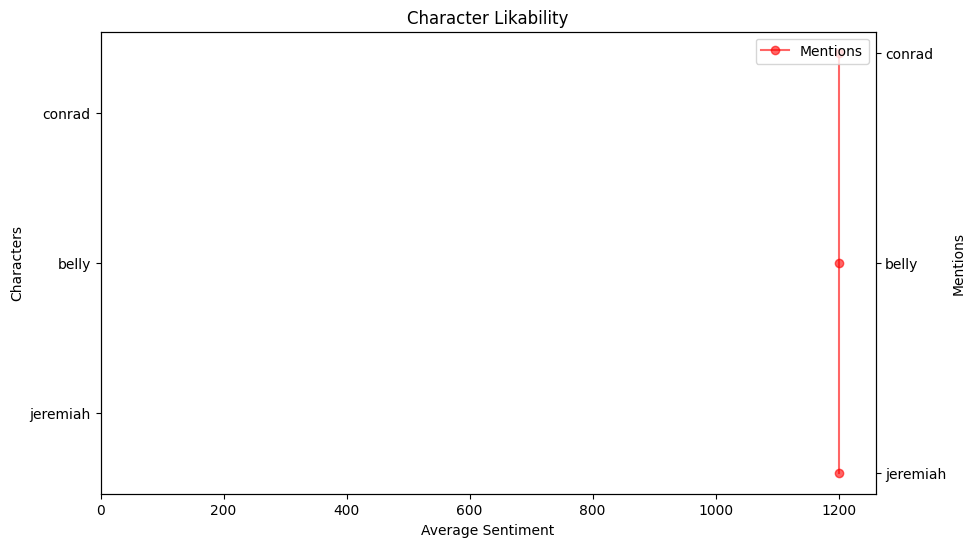

In [1]:
import pandas as pd
import nltk
import spacy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import defaultdict
import string
import matplotlib.pyplot as plt

# Download NLTK data files
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Load spaCy model for Named Entity Recognition (NER)
nlp = spacy.load("en_core_web_sm")
valid_characters = ['belly', 'conrad', 'jeremiah']  # You can add more characters here

# Function to clean and tokenize text
def preprocess_text(text):
    # Tokenize
    tokens = nltk.word_tokenize(text.lower())
    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]
    return tokens

# Function to analyze sentiment of a text
def analyze_sentiment(text):
    sentiment_score = sid.polarity_scores(text)
    return sentiment_score['compound']  # Returns a score between -1 and 1

# Function to extract character names using spaCy's NER
def extract_characters(text):
    doc = nlp(text)
    # Extract named entities (persons) from the text using spaCy NER
    characters = [ent.text.lower() for ent in doc.ents if ent.label_ == "PERSON"]
    # Manually check for specific character names
    specific_characters = ['belly', 'conrad', 'jeremiah']
    # Add these specific characters to the list if they appear
    characters.extend([char for char in specific_characters if char in text.lower()])
    # Remove duplicates (if any) and filter out non-character mentions
    characters = list(set(characters))  # Remove duplicates
    characters = [char for char in characters if char in valid_characters]  # Filter valid characters
    print(f"Extracted characters from review: {characters}")  # Debug line to see what's extracted
    return characters

# Function to process reviews and extract character mentions and sentiment
def analyze_reviews(reviews):
    character_sentiments = defaultdict(list)
    character_mentions = defaultdict(int)

    for review in reviews:
        # Preprocess the review
        review_text = review.lower()

        # Extract characters mentioned in the review
        characters = extract_characters(review_text)

        # Analyze sentiment for the whole review
        sentiment = analyze_sentiment(review)

        # For each character mentioned in the review, update their sentiment and mention count
        for character in characters:
            character_sentiments[character].append(sentiment)
            character_mentions[character] += 1

    # Calculate average sentiment for each character
    character_avg_sentiments = {
        character: sum(sentiments) / len(sentiments)
        for character, sentiments in character_sentiments.items()
    }

    return character_avg_sentiments, character_mentions

# Function to visualize the results
def plot_character_likability(character_avg_sentiments, character_mentions):
    # Sort characters by their average sentiment
    sorted_characters = sorted(character_avg_sentiments.items(), key=lambda x: x[1], reverse=True)

    # Prepare data for plotting
    characters, sentiment_scores = zip(*sorted_characters)
    mention_counts = [character_mentions[character] for character in characters]

    # Plotting the results
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Bar chart for average sentiment
    ax1.barh(characters, sentiment_scores, color='skyblue', label='Average Sentiment')
    ax1.set_xlabel('Average Sentiment')
    ax1.set_ylabel('Characters')

    # Create a second axis to show the number of mentions
    ax2 = ax1.twinx()
    ax2.plot(mention_counts, characters, 'ro-', label='Mentions', alpha=0.6)
    ax2.set_ylabel('Mentions')

    plt.title('Character Likability')
    plt.legend(loc="upper right")
    plt.show()

reviews_df = pd.read_csv('../../data/cleaned_reviews.csv')
# Analyze reviews
character_avg_sentiments, character_mentions = analyze_reviews(reviews_df['cleaned_review'])
# Print average sentiment for each character
print("Average Sentiment for each character:")
for character, sentiment in character_avg_sentiments.items():
    print(f"{character}: {sentiment:.2f}")

# Plot the character likability
plot_character_likability(character_avg_sentiments, character_mentions)

In [2]:
character_avg_sentiments

{'conrad': 0.8781500000000029,
 'jeremiah': 0.9402750000000027,
 'belly': 0.9126500000000046}